In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [42]:
%matplotlib inline

In [43]:
plt.rcParams['svg.fonttype'] = 'none'

In [44]:
def prettify(s):
    if s == s.upper():
        return s
    else:
        return s.capitalize()

In [45]:
adip_df = pd.read_excel("../Data/Growth_data/Supplementary-screening/adipate_ALE-KOs_102114.xlsx", sheet_name="subtracted")
adip_df = adip_df.reset_index()

adip_df = adip_df[pd.notnull(adip_df["Unnamed: 0"])]
adip_df["sample"] = adip_df["Unnamed: 2"]

del adip_df["Unnamed: 0"]
del adip_df["Unnamed: 1"]
del adip_df["Unnamed: 2"]
del adip_df["TIME [h] ->"]

adip_df["strain"] = adip_df["sample"].map(lambda x: x[:-2])
exclude_adip_samples = ["ADIP1-9_2"]
adip_df = adip_df[~adip_df["sample"].isin(exclude_adip_samples)]

exclude_adip = ["ADIP3-8", "ADIP7-5", "ADIP4-1", "ADIP3-4", "ADIP3-2", "ADIP7-2", "proV", "ybjL", "kgtP_ybjL", "kgtP_sspA"]
adip_df = adip_df[~adip_df["strain"].isin(exclude_adip)]

adip_df = adip_df.drop(columns='index')

In [47]:
glut_df = pd.read_excel("../Data/Growth_data/Supplementary-screening/glutarate_ALE-KOs_102814.xlsx", sheet_name="subtracted")


glut_df = glut_df.reset_index()
glut_df = glut_df[pd.notnull(glut_df["Unnamed: 0"])]
glut_df["sample"] = glut_df["Unnamed: 2"]
del glut_df["Unnamed: 0"]
del glut_df["Unnamed: 1"]
del glut_df["Unnamed: 2"]
del glut_df["TIME [h] ->"]


glut_df = glut_df[~glut_df["sample"].isin(["nothing", "M9 blank"])]

glut_df["strain"] = glut_df["sample"].map(lambda x: x[:-2])
exclude_glut_samples = []
glut_df = glut_df[~glut_df["sample"].isin(exclude_glut_samples)]

exclude_glut = ["proV", "ybjL", "kgtP_ybjL", "kgtP_sspA"]
glut_df = glut_df[~glut_df["strain"].isin(exclude_glut)]

glut_df = glut_df.drop(columns='index')

In [50]:
glut_df

,0.00494,0.17155,0.33821,0.50499,0.67159,0.83831,1.00497,1.17164,1.3384,1.50495,...,45.50778,45.67446,45.84109,46.00784,46.17452,46.34113,46.5078,46.67439,sample,strain
0,2.703,1.563,1.090,0.954,1.005,1.043,0.748,0.858,0.700,0.475,...,9.075,9.012,8.980,8.624,9.177,8.927,8.853,8.781,MG1655-1,MG1655
1,0.026,0.000,0.188,0.242,0.368,0.265,0.303,0.454,0.448,0.398,...,18.181,18.010,17.886,17.983,17.942,17.982,18.108,18.003,GLUT1-3_1,GLUT1-3
2,0.000,0.017,0.202,0.334,0.486,0.546,0.640,0.653,0.619,0.709,...,25.259,25.320,25.356,25.400,25.440,25.602,25.675,25.650,GLUT1-10_1,GLUT1-10
3,0.000,0.135,0.468,0.537,0.653,0.570,0.601,0.637,0.710,0.681,...,22.944,23.171,23.042,23.113,23.014,23.087,23.101,23.192,GLUT4-1_1,GLUT4-1
4,0.000,0.179,0.334,0.515,0.582,0.502,0.591,0.602,0.594,0.595,...,29.908,30.029,29.890,30.190,30.088,30.142,30.216,30.189,GLUT8-6_1,GLUT8-6
5,0.000,0.086,0.419,0.515,0.524,0.577,0.581,0.506,0.635,0.662,...,18.273,18.158,18.317,18.217,18.119,18.045,18.510,18.293,kgtP-1,kgtP
8,0.000,0.420,0.523,0.604,0.740,0.754,0.739,0.824,0.782,0.928,...,10.942,10.740,10.338,10.293,10.592,10.316,10.892,10.988,MG1655-2,MG1655
9,0.000,0.105,0.195,0.287,0.386,0.390,0.449,0.530,0.538,0.480,...,17.764,17.878,18.004,17.877,17.863,17.878,17.977,17.899,GLUT1-3_2,GLUT1-3
10,0.058,0.000,0.185,0.371,0.523,0.611,0.650,0.636,0.714,0.833,...,25.355,25.472,25.564,25.440,25.339,25.613,25.686,25.549,GLUT1-10_2,GLUT1-10
11,0.034,0.000,0.283,0.488,0.635,0.527,0.615,0.791,0.616,0.785,...,22.514,22.205,22.415,22.430,22.584,22.459,22.474,22.508,GLUT4-1_2,GLUT4-1


In [51]:
colors = ["#66358c", "#feba19", "#28a6e0", "#1c783c"]
label_dict = {
    "kgtP": "$\Delta$kgtP",
    "kgtP_proV": "$\Delta$kgtP $\Delta$proV",
    "kgtP_proV_ybjL": "$\Delta$kgtP $\Delta$proV $\Delta$ybjL",
    "pykF": "$\Delta$pykF",
    "ilvH": "MG1655 ilvH-L9F"
}

def plot_curves(df, last_label="", xmax=30, ymax=30, use_gray=True, strain_order=None):
    color_it = iter(colors)
    strain_means = df.groupby("strain").mean().transpose()
    strain_stds = df.groupby("strain").std().transpose() #/ 3**0.5
    if strain_order is None:
        columns = strain_means.columns
    else:
        columns = strain_order
    for i, strain in enumerate(columns):
        # plt.subplot(5, 5, i+1)
        # plt.title(strain)
        if use_gray and (strain.startswith("ADIP") or strain.startswith("GLUT") or strain.startswith("IBUA")):
            label = None
            color = "grey"
        else:
            label = strain
            color=next(color_it)
        plt.plot(strain_means.index, strain_means[strain].values, color=color, linewidth=3)
        plt.fill_between(
            strain_means.index.astype("float"),
            (strain_means[strain] + strain_stds[strain]).values,
            (strain_means[strain] - strain_stds[strain]).values,
            color=color,
            alpha=0.4
        )
        plt.fill_between([0, 0], [0, 0], color=color, label=label_dict.get(label, label))
    plt.fill_between([0, 0], [0, 0], color="grey", label=last_label)
    plt.ylim([-2, ymax])
    plt.xlim([0, xmax])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Time (h)", fontsize=16)
    plt.ylabel("Cell density (a.u.)", fontsize=16)
    plt.grid(axis="y")

In [52]:
recon_df = pd.read_csv("../Data/Growth_data/Reconstructions/Reconstruction_dataframe.tsv", index_col=0, sep="\t")
recon_df["strain"] = recon_df["clean_strain"]
recon_exclude_strains = ["OCTA1-9", "OCTA2-14", "metJ_relA_clsA"]

In [53]:
less_frequency_mutation=[
'acrB',
'clsA',
'fabR',
'treA',
'yfgF',
'rzpD',
'mpl',
'wbbK',
'ybeX',
'ygaC',
'cheR',
'glyQ',
'ilvH',
'ilvN',
'phoU',
'yhjK',
'ypjA',
'stfE',
'rlmH',
'bioAB',
'ompC',
'ompR',
'opgH',
'proP',
'proQ',
'ptrA',
'argG',
'edd/zwf',
'treR',
'mppA',
]

In [54]:
recon_df_drop = recon_df.copy()

In [55]:
for i in recon_df_drop.index:
    checker = 0
    for j in less_frequency_mutation:
        if j in recon_df_drop.loc[i,'strain']:
            checker=1
    if checker==1:
        recon_df_drop=recon_df_drop.drop(index=i)
            

In [56]:
recon_df

,compound,clean_strain,pretty_name,slope,std,stderr,strain
0,"1,2-propanediol",12PD3-8,12PD3-8,0.574087,0.050325,0.016775,12PD3-8
121,"1,2-propanediol",metJ_relA,ΔmetJ relA::kan,0.160230,0.100151,0.057822,metJ_relA
119,"1,2-propanediol",metJ_purT,ΔmetJ purT::kan,0.251733,0.135343,0.078141,metJ_purT
117,"1,2-propanediol",metJ_acrB,ΔmetJ acrB::kan,0.246671,0.118900,0.048541,metJ_acrB
266,"1,2-propanediol",yfgF,yfgF::kan,0.165825,0.094845,0.038720,yfgF
...,...,...,...,...,...,...,...
175,putrescine,proV_cspC,ΔproV cspC::kan,0.123173,0.060296,0.020099,proV_cspC
252,putrescine,rpsG1_ybeX_mpl,ΔproV rpsG1* ΔybeX mpl::kan,0.138592,0.006163,0.003558,rpsG1_ybeX_mpl
177,putrescine,proV_cspC_mpl,ΔproV ΔcspC mpl::kan,0.191840,0.016638,0.009606,proV_cspC_mpl
242,putrescine,rpsG1_mreB,ΔproV rpsG1* mreB*,0.280065,0.003971,0.002293,rpsG1_mreB


In [57]:
recon_df=recon_df_drop

In [58]:
recon_df

,compound,clean_strain,pretty_name,slope,std,stderr,strain
0,"1,2-propanediol",12PD3-8,12PD3-8,0.574087,0.050325,0.016775,12PD3-8
121,"1,2-propanediol",metJ_relA,ΔmetJ relA::kan,0.160230,0.100151,0.057822,metJ_relA
119,"1,2-propanediol",metJ_purT,ΔmetJ purT::kan,0.251733,0.135343,0.078141,metJ_purT
115,"1,2-propanediol",metJ-sm,NaN,0.110332,0.013915,0.008034,metJ-sm
113,"1,2-propanediol",metJ-lg,NaN,0.090761,0.054228,0.031308,metJ-lg
...,...,...,...,...,...,...,...
204,putrescine,proV_spoT,ΔproV spoT*,0.000000,0.000000,0.000000,proV_spoT
211,putrescine,proV_yobF,ΔproV yobF::kan,0.105148,0.054040,0.031200,proV_yobF
175,putrescine,proV_cspC,ΔproV cspC::kan,0.123173,0.060296,0.020099,proV_cspC
242,putrescine,rpsG1_mreB,ΔproV rpsG1* mreB*,0.280065,0.003971,0.002293,rpsG1_mreB


In [59]:
temp=set(recon_df.strain)

In [60]:
recon_exclude_strains

['OCTA1-9', 'OCTA2-14', 'metJ_relA_clsA']

In [61]:
recon_df = recon_df[~recon_df["strain"].isin(recon_exclude_strains)]

screen_df = pd.read_csv("../Data/Growth_data/evolved-isolate-growth-data/Evolved_isolates_data_frame.tsv", sep="\t")
screen_df = screen_df[screen_df["growth_rate"] != 0]
screen_df = screen_df.groupby(["compound", "strain"]).mean().reset_index()

In [62]:
recon_df

,compound,clean_strain,pretty_name,slope,std,stderr,strain
0,"1,2-propanediol",12PD3-8,12PD3-8,0.574087,0.050325,0.016775,12PD3-8
121,"1,2-propanediol",metJ_relA,ΔmetJ relA::kan,0.160230,0.100151,0.057822,metJ_relA
119,"1,2-propanediol",metJ_purT,ΔmetJ purT::kan,0.251733,0.135343,0.078141,metJ_purT
115,"1,2-propanediol",metJ-sm,NaN,0.110332,0.013915,0.008034,metJ-sm
113,"1,2-propanediol",metJ-lg,NaN,0.090761,0.054228,0.031308,metJ-lg
...,...,...,...,...,...,...,...
204,putrescine,proV_spoT,ΔproV spoT*,0.000000,0.000000,0.000000,proV_spoT
211,putrescine,proV_yobF,ΔproV yobF::kan,0.105148,0.054040,0.031200,proV_yobF
175,putrescine,proV_cspC,ΔproV cspC::kan,0.123173,0.060296,0.020099,proV_cspC
242,putrescine,rpsG1_mreB,ΔproV rpsG1* mreB*,0.280065,0.003971,0.002293,rpsG1_mreB


In [63]:
screen_df#.groupby("strain")

,compound,strain,growth_rate,repl
0,"1,2-propanediol",12PD1-10,0.568962,2.0
1,"1,2-propanediol",12PD1-2,0.612649,1.5
2,"1,2-propanediol",12PD1-4,0.697008,2.0
3,"1,2-propanediol",12PD2-8,0.540062,2.0
4,"1,2-propanediol",12PD2-9,0.376147,2.0
...,...,...,...,...
219,putrescine,PUTR7-7,0.270696,1.5
220,putrescine,PUTR7-9,0.256668,1.5
221,putrescine,PUTR8-10,0.330051,1.5
222,putrescine,PUTR8-3,0.268784,1.5


In [64]:
compound_codes = {
    "1,2-propanediol": "12PD", "2,3-butanediol": "23BD", "HMDA": "HMDA",
    "putrescine": "PUTR", "glutarate": "GLUT", "adipate": "ADIP", "hexanoate": "HEXA",
    "octanoate": "OCTA", "coumarate": "COUM", "isobutyrate": "IBUA", "butanol": "BUT"
}

plot_compounds = [
    "1,2-propanediol", "2,3-butanediol","glutarate", "adipate", "putrescine",  "HMDA", 
    "isobutyrate", "coumarate",  "butanol", "octanoate" , "hexanoate"
]

In [65]:
#plot_compounds=["HMDA"]

In [66]:
data = []

for i, comp in enumerate(plot_compounds):
    comp_df = recon_df[recon_df["compound"] == comp]
    baseline = float(comp_df[comp_df["strain"] == "MG1655"]["slope"].iloc[0])
    comp_df = comp_df[comp_df["strain"] != "MG1655"].copy()
    comp_df["slope"] = comp_df["slope"] - baseline
    ale_df = comp_df[comp_df["strain"].str.startswith(compound_codes[comp])].copy()
    for c in compound_codes.values():
        comp_df = comp_df[~comp_df["strain"].str.startswith(c)]
    comp_df = comp_df.copy()
    comp_df["type"] = "Reconstructed"
    ale_df["type"] = "ALE"
    #data.append(ale_df)
    ale_df = screen_df[screen_df["compound"] == comp]
    ale_mg_rate = ale_df[ale_df["strain"] == "MG1655"]["growth_rate"].mean()
    ale_df = ale_df[ale_df["strain"] != "MG1655"].copy()
    ale_df["slope"] = ale_df["growth_rate"] - ale_mg_rate
    ale_df["type"] = "ALE"
    data.append(comp_df)
    data.append(ale_df)

plot_df = pd.concat(data)

In [67]:
comp_df

,compound,clean_strain,pretty_name,slope,std,stderr,strain,type
234,hexanoate,rph,rph::kan,-0.143081,0.066644,0.038477,rph,Reconstructed
107,hexanoate,mdtK,mdtK::kan,0.040221,0.011179,0.006454,mdtK,Reconstructed


In [68]:
ale_df

,compound,strain,growth_rate,repl,slope,type
145,hexanoate,HEXA1-1,0.756665,2.0,0.556854,ALE
146,hexanoate,HEXA1-4,0.562186,2.0,0.362375,ALE
147,hexanoate,HEXA1-5,0.492667,2.0,0.292856,ALE
148,hexanoate,HEXA2-10,0.495275,2.0,0.295464,ALE
149,hexanoate,HEXA2-3,0.698404,2.0,0.498593,ALE
150,hexanoate,HEXA2-9,0.500316,2.0,0.300505,ALE
151,hexanoate,HEXA3-1,0.580389,1.5,0.380578,ALE
152,hexanoate,HEXA3-7,0.399786,1.5,0.199975,ALE
153,hexanoate,HEXA3-9,0.560931,1.5,0.361121,ALE
154,hexanoate,HEXA4-10,0.982944,1.5,0.783133,ALE


In [69]:
plot_df

,compound,clean_strain,pretty_name,slope,std,stderr,strain,type,growth_rate,repl
121,"1,2-propanediol",metJ_relA,ΔmetJ relA::kan,0.024898,0.100151,0.057822,metJ_relA,Reconstructed,NaN,NaN
119,"1,2-propanediol",metJ_purT,ΔmetJ purT::kan,0.116400,0.135343,0.078141,metJ_purT,Reconstructed,NaN,NaN
115,"1,2-propanediol",metJ-sm,NaN,-0.025000,0.013915,0.008034,metJ-sm,Reconstructed,NaN,NaN
113,"1,2-propanediol",metJ-lg,NaN,-0.044572,0.054228,0.031308,metJ-lg,Reconstructed,NaN,NaN
254,"1,2-propanediol",sspA,sspA::kan,0.210236,0.137622,0.079456,sspA,Reconstructed,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
160,hexanoate,NaN,NaN,0.357302,NaN,NaN,HEXA6-9,ALE,0.557113,1.5
161,hexanoate,NaN,NaN,0.084680,NaN,NaN,HEXA7-2,ALE,0.284490,1.5
162,hexanoate,NaN,NaN,0.491074,NaN,NaN,HEXA8-1,ALE,0.690885,1.5
163,hexanoate,NaN,NaN,0.219854,NaN,NaN,HEXA8-2,ALE,0.419665,1.5


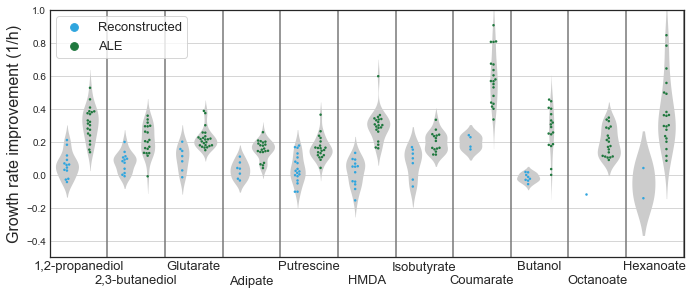

In [74]:
plt.style.use("seaborn-white")

fig = plt.figure(figsize=[25, 10])

mutant_names = {
    "sspA": "$\Delta$sspA",
    "metJ_relA_clsA": "$\Delta$metJ $\Delta$relA $\Delta$clsA",
    "rpsG1_mreB_ybeX": "$\Delta$proV $\Delta$ybeX rpsG1* mreB*",
    "rpsG1_mreB": "$\Delta$proV rpsG1* mreB*",
    "kgtP_proV_ybjL": "$\Delta$kgtP $\Delta$proV $\Delta$ybjL",
    "bioAB_ompR": "$\Delta$ompR bioB*",
    "stfE": "$\Delta$stfE",
    "nadR_mprA_yhjK": "$\Delta$nadR $\Delta$mprA $\Delta$yhjK",
    "pykF_rpoS": "$\Delta$pykF $\Delta$rpoS",
    "marC_rob_mppA_yobF": "$\Delta$marC $\Delta$rob $\Delta$mmpA $\Delta$yobF",
    "ypjA_mprA_nadR":"$\Delta$ypjA $\Delta$mprA $\Delta$nadR",
    "ompR_proQ":"$\Delta$ompR $\Delta$proQ",
    "gtrS":"$\Delta$gtrS",
    "nadR_rpoA":"$\Delta$nadR rpoA*",
    "rob_yobF":"$\Delta$rob $\Delta$yobF",
    "mdtK":"$\Delta$mdtK",


}

tick_fontsize = 15
legend_fs = 13


ax = fig.add_subplot(2, 2, 1)

plot_df_1 = plot_df.reset_index().copy()
plot_df_1 = plot_df_1.sort_values("type", ascending=False)
ordered_index = sorted(plot_df_1.index, key=lambda x: plot_compounds.index(plot_df_1.loc[x, "compound"]))
plot_df_1 = plot_df_1.reindex(ordered_index)


sbn.violinplot(
    x="compound", y="slope", hue="type", data=plot_df_1,
    inner=None, saturation=1, palette=["#cccccc"]*2, linewidth=0
)
sbn.swarmplot(
    x="compound", y="slope", hue="type", data=plot_df_1, palette=["#2fa5de", "#1f783e"],
    dodge=True, s=2.5
)

plt.xticks(rotation=90)
for i in range(11):
    plt.plot([i+0.5, i+0.5], [-.5, 1], "-", color="#777777")
plt.ylim([-0.5, 1])
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[2:], labels[2:], title=None, frameon=True, loc="upper left", fontsize=legend_fs)
plt.grid(axis="y")
plt.ylabel("Growth rate improvement (1/h)", fontsize=16)
plt.xlabel("")
#plt.yscale('log',base=2) 

tick_labels = []
for i, n in enumerate(plot_compounds):
    tick_labels.append(prettify(n) + "\n" if i % 2 == 0 else "\n" + prettify(n))

plt.xticks(range(11), tick_labels, rotation=0, fontsize=13)

plt.savefig("../Plots/Figure 4A - Mechanisms.svg", bbox_inches="tight")

In [77]:
plot_df_1

,index,compound,clean_strain,pretty_name,slope,std,stderr,strain,type,growth_rate,repl
0,121,"1,2-propanediol",metJ_relA,ΔmetJ relA::kan,0.024898,0.100151,0.057822,metJ_relA,Reconstructed,NaN,NaN
1,119,"1,2-propanediol",metJ_purT,ΔmetJ purT::kan,0.116400,0.135343,0.078141,metJ_purT,Reconstructed,NaN,NaN
12,135,"1,2-propanediol",metJ_relA_yeaR,ΔmetJ ΔrelA yeaR::kan,0.043177,0.071618,0.041349,metJ_relA_yeaR,Reconstructed,NaN,NaN
11,129,"1,2-propanediol",metJ_relA_rnb,ΔmetJ ΔrelA rnb::kan,0.068389,0.036075,0.020828,metJ_relA_rnb,Reconstructed,NaN,NaN
10,127,"1,2-propanediol",metJ_relA_purT,ΔmetJ ΔrelA purT::kan,0.061612,0.173363,0.100091,metJ_relA_purT,Reconstructed,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
288,148,hexanoate,NaN,NaN,0.295464,NaN,NaN,HEXA2-10,ALE,0.495275,2.0
287,147,hexanoate,NaN,NaN,0.292856,NaN,NaN,HEXA1-5,ALE,0.492667,2.0
286,146,hexanoate,NaN,NaN,0.362375,NaN,NaN,HEXA1-4,ALE,0.562186,2.0
285,145,hexanoate,NaN,NaN,0.556854,NaN,NaN,HEXA1-1,ALE,0.756665,2.0


/var/folders/lb/2grw3fwd7pbf9hc08c9r8t4h0000gn/T/ipykernel_1731/3301285219.py:6: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  plot_ale_df = test_df.groupby(["compound", "type"]).quantile(0.75).reset_index()


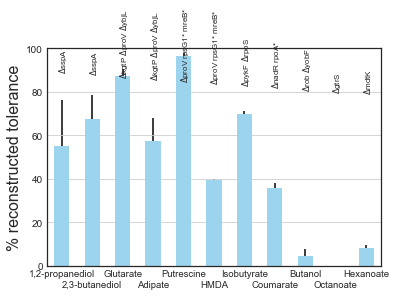

In [71]:
ax = fig.add_subplot(2, 2, 3)
test_df = plot_df.sort_values("slope", ascending=False)
plot_recon_df = test_df.groupby(["compound", "type"]).first().reset_index()
plot_recon_df = plot_recon_df[plot_recon_df["type"] == "Reconstructed"].set_index("compound")

plot_ale_df = test_df.groupby(["compound", "type"]).quantile(0.75).reset_index()
plot_ale_df = plot_ale_df[plot_ale_df["type"] == "ALE"].set_index("compound")

plot_recon_df = plot_recon_df.reindex(plot_compounds)
plot_ale_df = plot_ale_df.reindex(plot_compounds)

"""
percentage_recon = (
    plot_recon_df["slope"] / plot_ale_df["slope"] * 100
).reindex([plot_compounds])
"""
percentage_recon = (
    plot_recon_df["slope"] / plot_ale_df["slope"] * 100
)


percentage_recon.plot(kind="bar", color="#9cd4ee")  # "#807dfc"

plt.errorbar(
    range(11),
    plot_recon_df["slope"] / plot_ale_df["slope"] * 100,
    plot_recon_df["stderr"] / plot_ale_df["slope"] * 100, 
    fmt=".",
    markersize=0,
    zorder=0,
    color="k"
)

for i, (k, v) in enumerate(percentage_recon.items()):
    label = plot_recon_df["strain"][k]
    plt.text(i-0.15, 90-i, mutant_names[label], rotation=90, fontsize=8)

tick_labels = []
for i, (k, v) in enumerate(percentage_recon.items()):
    label = plot_recon_df["strain"][k]
    tick_labels.append(prettify(k) + "\n" if i % 2 == 0 else "\n" + prettify(k) )#+ "\n(" + label + ")")
    
plt.ylim([0, 100])
plt.ylabel("% reconstructed tolerance", fontsize=16)
plt.xlabel("")
plt.grid(axis="y")
plt.xticks(range(11), tick_labels, fontsize=9.5, rotation=0)
None

plt.savefig("../Plots/Figure 4B - Mechanisms.svg", bbox_inches="tight")

In [72]:
glut_df

,0.00494,0.17155,0.33821,0.50499,0.67159,0.83831,1.00497,1.17164,1.3384,1.50495,...,45.50778,45.67446,45.84109,46.00784,46.17452,46.34113,46.5078,46.67439,sample,strain
0,2.703,1.563,1.090,0.954,1.005,1.043,0.748,0.858,0.700,0.475,...,9.075,9.012,8.980,8.624,9.177,8.927,8.853,8.781,MG1655-1,MG1655
1,0.026,0.000,0.188,0.242,0.368,0.265,0.303,0.454,0.448,0.398,...,18.181,18.010,17.886,17.983,17.942,17.982,18.108,18.003,GLUT1-3_1,GLUT1-3
2,0.000,0.017,0.202,0.334,0.486,0.546,0.640,0.653,0.619,0.709,...,25.259,25.320,25.356,25.400,25.440,25.602,25.675,25.650,GLUT1-10_1,GLUT1-10
3,0.000,0.135,0.468,0.537,0.653,0.570,0.601,0.637,0.710,0.681,...,22.944,23.171,23.042,23.113,23.014,23.087,23.101,23.192,GLUT4-1_1,GLUT4-1
4,0.000,0.179,0.334,0.515,0.582,0.502,0.591,0.602,0.594,0.595,...,29.908,30.029,29.890,30.190,30.088,30.142,30.216,30.189,GLUT8-6_1,GLUT8-6
5,0.000,0.086,0.419,0.515,0.524,0.577,0.581,0.506,0.635,0.662,...,18.273,18.158,18.317,18.217,18.119,18.045,18.510,18.293,kgtP-1,kgtP
8,0.000,0.420,0.523,0.604,0.740,0.754,0.739,0.824,0.782,0.928,...,10.942,10.740,10.338,10.293,10.592,10.316,10.892,10.988,MG1655-2,MG1655
9,0.000,0.105,0.195,0.287,0.386,0.390,0.449,0.530,0.538,0.480,...,17.764,17.878,18.004,17.877,17.863,17.878,17.977,17.899,GLUT1-3_2,GLUT1-3
10,0.058,0.000,0.185,0.371,0.523,0.611,0.650,0.636,0.714,0.833,...,25.355,25.472,25.564,25.440,25.339,25.613,25.686,25.549,GLUT1-10_2,GLUT1-10
11,0.034,0.000,0.283,0.488,0.635,0.527,0.615,0.791,0.616,0.785,...,22.514,22.205,22.415,22.430,22.584,22.459,22.474,22.508,GLUT4-1_2,GLUT4-1


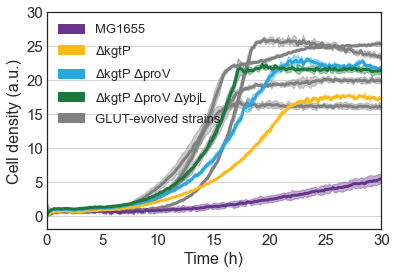

In [52]:
plt.subplot(1, 1, 1)
plot_curves(glut_df, last_label="GLUT-evolved strains")

plt.legend(loc="upper left", fontsize=legend_fs)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

plt.savefig("../Plots/Figure 4C - Mechanisms.svg", bbox_inches="tight")

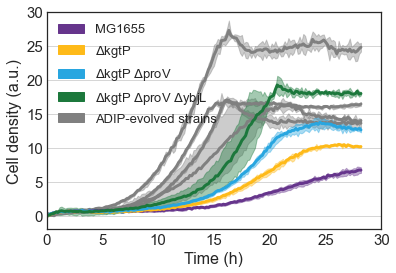

In [54]:
plt.subplot(1, 1, 1)
plot_curves(adip_df, last_label="ADIP-evolved strains")
plt.legend(loc="upper left", fontsize=legend_fs)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

None
#plt.tight_layout()
plt.savefig("../Plots/Figure 4D - Mechanisms.svg", bbox_inches="tight")

In [ ]:
glut_df = pd.read_excel("../Data/Growth_data/Supplementary-screening/Putre", sheet_name="subtracted")


glut_df = glut_df.reset_index()
glut_df = glut_df[pd.notnull(glut_df["Unnamed: 0"])]
glut_df["sample"] = glut_df["Unnamed: 2"]
del glut_df["Unnamed: 0"]
del glut_df["Unnamed: 1"]
del glut_df["Unnamed: 2"]
del glut_df["TIME [h] ->"]


glut_df = glut_df[~glut_df["sample"].isin(["nothing", "M9 blank"])]

glut_df["strain"] = glut_df["sample"].map(lambda x: x[:-2])
exclude_glut_samples = []
glut_df = glut_df[~glut_df["sample"].isin(exclude_glut_samples)]

exclude_glut = ["proV", "ybjL", "kgtP_ybjL", "kgtP_sspA"]
glut_df = glut_df[~glut_df["strain"].isin(exclude_glut)]

glut_df = glut_df.drop(columns='index')